In [26]:
%matplotlib inline
import os
import re

import matplotlib
import numpy as np
import pandas as pd
import xarray as xr

import climatools.html.html as climahtml
import climatools.scripts.g1_threshold as scripts

import IPython.display as display

import imp
imp.reload(scripts)

/lfs1/home/jackyu/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


<module 'climatools.scripts.g1_threshold' from '/lfs1/home/jackyu/climatools/climatools/scripts/g1_threshold.py'>

In [27]:
# for printing some input parameters

def innames():
    return ['vstar', 'nband', 'nv', 'dv',
            'flgh2o',
            'tsfc',
            'pressure_reference_1',
            'temperature_reference_1', 
            'pressure_reference_2', 
            'temperature_reference_2',
            'ighigh', 
            'ng', 
            'nref',
            'p_refs',
            't_refs',
            'ng_refs',
            'absth',
            'wgt',
            'planck_wgt_flux',
            'option_wgt',
            'fac_meank',
            'klin']


def pattern_assign(name):
    return ''' 
    parameter .* :: \s* &? \s* ({} \s* = .* \n)
    '''.format(name)

def pattern_data(name):
    return '''
    (data [^/{name}]+ {name}[^,] [^/{name}]+ / [^/]+ /)
    '''.format(name=name)

def pattern_atmpro():
    return '''
    (include \s+ '.*\.pro')
    '''


def get_input_params(code, names):
    results = []
    for name in names:
        regex = re.compile(pattern_assign(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
        regex = re.compile(pattern_data(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
    regex = re.compile(pattern_atmpro(), re.VERBOSE)
    results.extend(regex.findall(code))
        
    results = [result.replace('_r8', '') for result in results]
    return results


In [56]:
analysis = scripts.Analysis()

In [57]:
crd = analysis.model('crd')
crd.type_model = 'crd'
crd.rundir = os.path.join('/lfs1/home/jackyu/radiation',
                          'crd/LW/examples/separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'co2',
                          'band03c_wn_720_800',
                          'ng_9',
                          'g_descending',
                          'refPTs_P_1_T_250__P_500_T_250',
                          'ng_refs_5__4',
                          'getabsth_auto__semiauto',
                          'absth_dlogN_uniform__dlogN_uniform',
                          'wgt_all.8__.8_.8_.95_1',
                          'bigsum',
                          'option_wgt_1',
                          'chou_0501_-_manual_abscom2_-_c4d230f',
                          'atmpro_mls')
crd.fpath_flux = 'output_fluxg.dat'
crd.fpath_coolr = 'output_coolrg.dat'
crd.linestyle = '-'
crd.load_data()

In [58]:
crdx_wgt = analysis.model('wgt')
crdx_wgt.type_model = 'crd'
crdx_wgt.rundir = os.path.join('/lfs1/home/jackyu/radiation',
                          'crd/LW/examples/separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'co2',
                          'band03c_wn_720_800',
                          'ng_9',
                          'g_descending',
                          'refPTs_P_1_T_250__P_500_T_250',
                          'ng_refs_5__4',
                          'getabsth_auto__semiauto',
                          'absth_dlogN_uniform__dlogN_uniform',
                          'wgt_all.8__.8_.8_.95_1',
                          'bigsum',
                          'option_wgt_1',
                          'chou_0501_-_manual_abscom2_-_c4d230f',
                          'atmpro_mls')
crdx_wgt.fpath_flux = 'output_xfluxg.dat'
crdx_wgt.fpath_coolr = 'output_xcoolrg.dat'
crdx_wgt.linestyle = '--'
crdx_wgt.load_data()

In [59]:
fig = analysis.fig_fluxcoolr('fig1', vartypes=['cooling rate'])
fig.ggroups = list(range(1, 9 + 1))
fig.vars_plot['flux'] = ['flug', 'fnetg']
fig.vars_plot['cooling rate'] = ['coolrg']
fig.colors['flug'] = 'darkred'
fig.colors['fnetg'] = 'lightcoral'
fig.colors['coolrg'] = 'blue'
fig.varlims_from_indexrange['linear'] = (50, 1050)
fig.varlims_from_indexrange['log'] = (1e-4, 50)

In [60]:
table_fluxg = analysis.table('table_fluxg')
table_fluxg.sumg = False
table_fluxg.vartype = 'flux'
table_fluxg.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolrg = analysis.table('table_coolrg')
table_coolrg.vartype = 'cooling rate'
table_coolrg.sumg = False
table_coolrg.at_pressures = crd.data['cooling rate']\
                               .coords['pressure']\
                               .isel(pressure=[0, -1])


In [61]:
table_flux = analysis.table('table_flux')
table_flux.sumg = True
table_flux.vartype = 'flux'
table_flux.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolr = analysis.table('table_coolr')
table_coolr.vartype = 'cooling rate'
table_coolr.sumg = True
table_coolr.at_pressures = crd.data['cooling rate']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

In [62]:
table_dgdgs = analysis.table('dgdgs')
table_dgdgs.vartype = 'dgdgs'
table_dgdgs.sumg = False

In [63]:
with open(os.path.join(crd.rundir, 'lblnew.f'), 
          mode='r', encoding='utf-8') as f:
    c = f.read()

print('\n\n'.join(get_input_params(c, innames())))

vstar = 720

nband = 80

nv = 200

dv = 0.005

tsfc = 294.0

ng = 9

nref = 2

p_refs = (/ 1,  500 /)

t_refs = (/ 250, 250 /)

ng_refs = (/ 5,   4 /)

data wgt
     &     /1, .95, .8, .8,
     &     5*.8/

planck_wgt_flux = 2

option_wgt = 1

klin = 6.375563e-24

include 'mls75.pro'


In [64]:
fig.display_hrefanchor()

In [65]:
table_fluxg.display_hrefanchor()
table_coolrg.display_hrefanchor()

table_flux.display_hrefanchor()
table_coolr.display_hrefanchor()

In [66]:
table_dgdgs.display_hrefanchor()

In [67]:
s_abscom = 'Overall absth'
display.HTML(climahtml.getHTML_hrefanchor(s_abscom))

In [68]:
s_ggroup_summary = 'g-group summary'
display.HTML(climahtml.getHTML_hrefanchor(s_ggroup_summary))

In [69]:
#for g in range(1, 20 + 1):
#    s = 'Table: cooling rate. g-group {}'.format(g)
#    html = climahtml.getHTML_hrefanchor(s)
#    display.display(display.HTML(html))

# Figure: cooling rate g-group 1

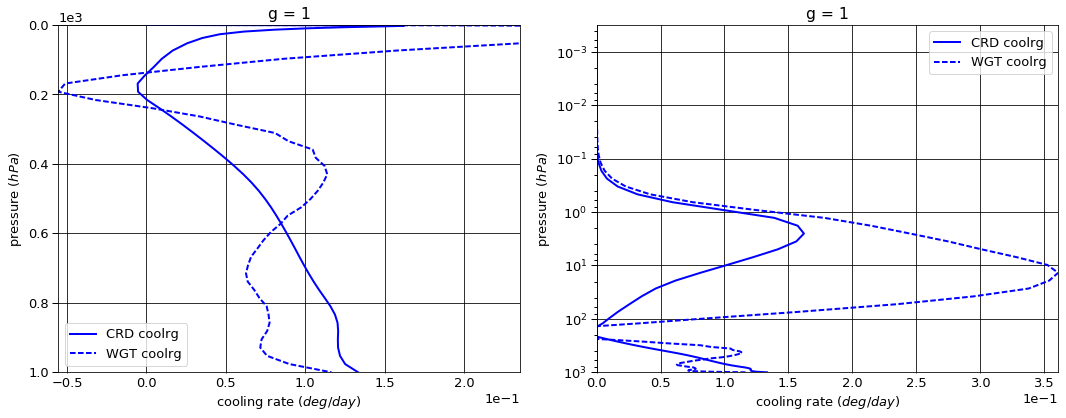

# Figure: cooling rate g-group 2

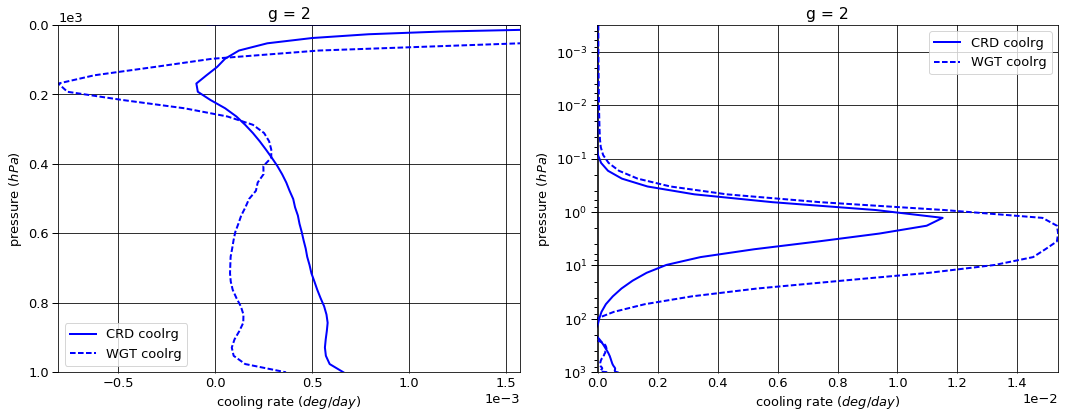

# Figure: cooling rate g-group 3

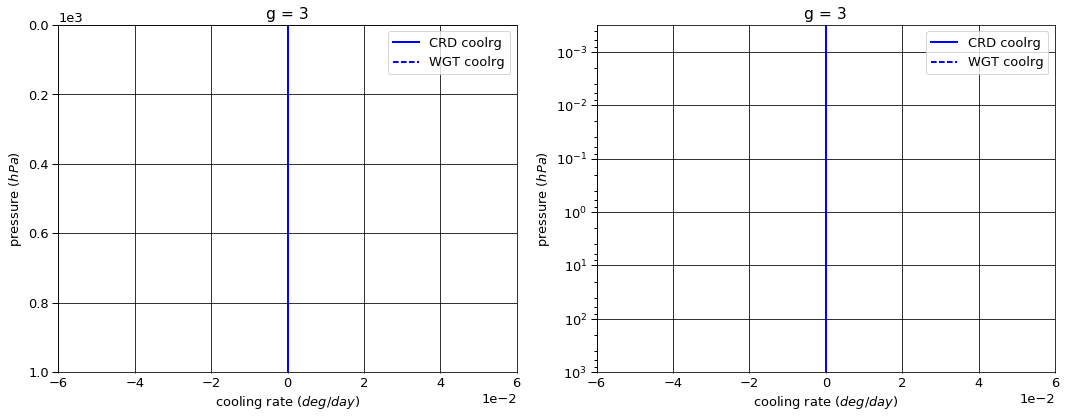

# Figure: cooling rate g-group 4

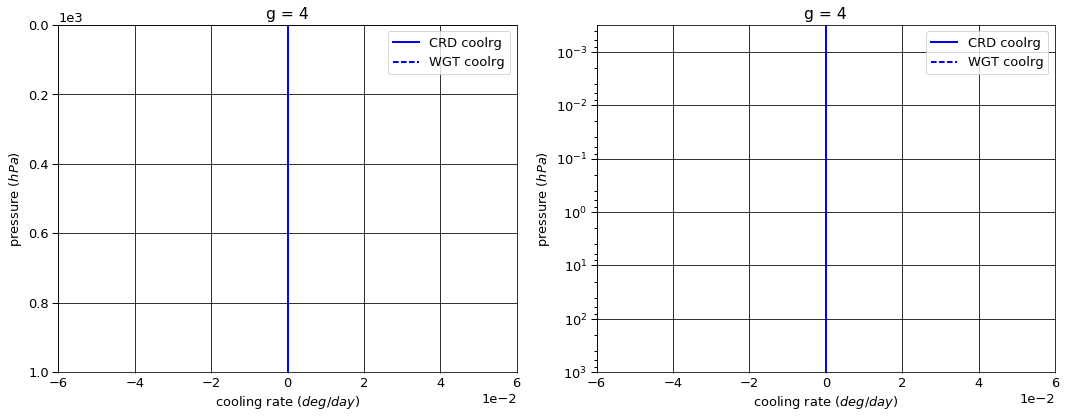

# Figure: cooling rate g-group 5

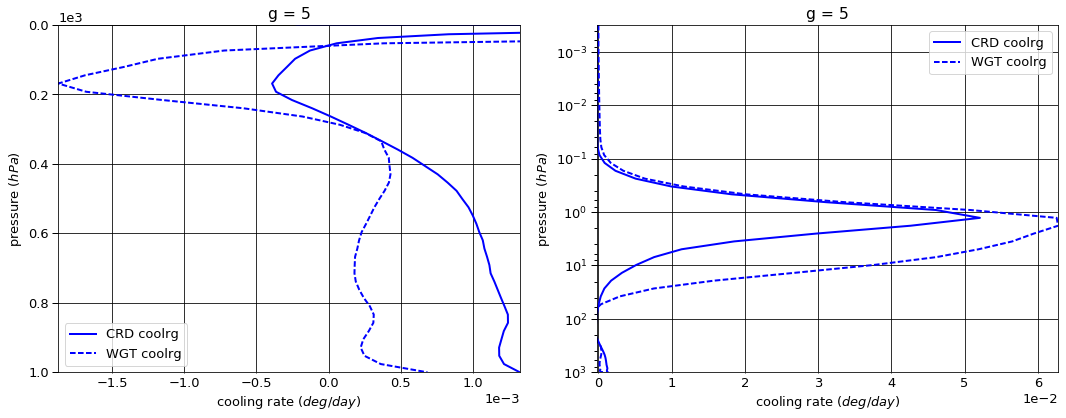

# Figure: cooling rate g-group 6

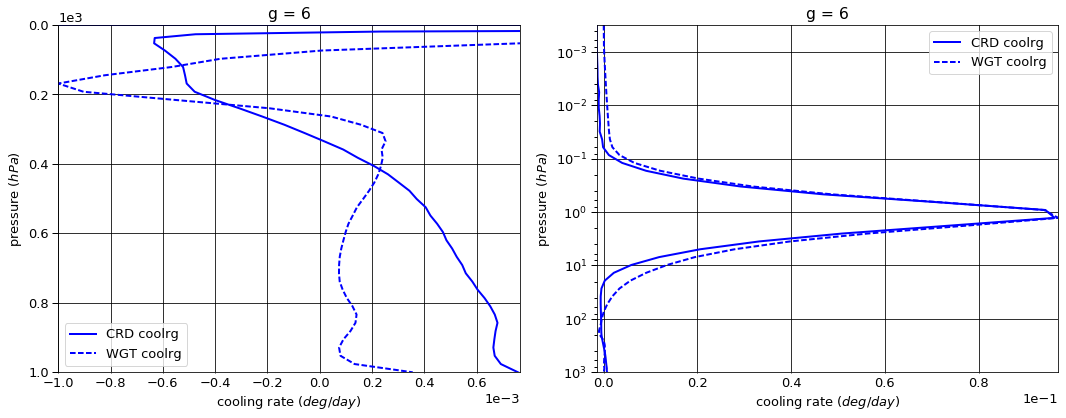

# Figure: cooling rate g-group 7

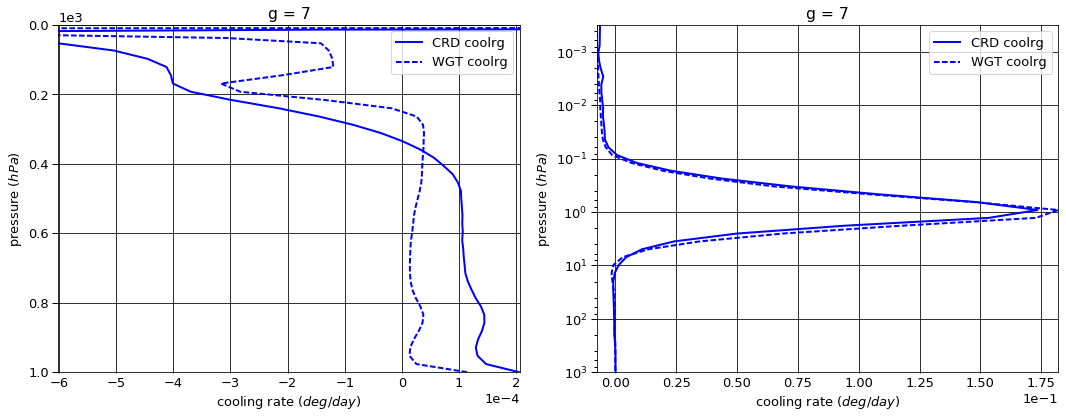

# Figure: cooling rate g-group 8

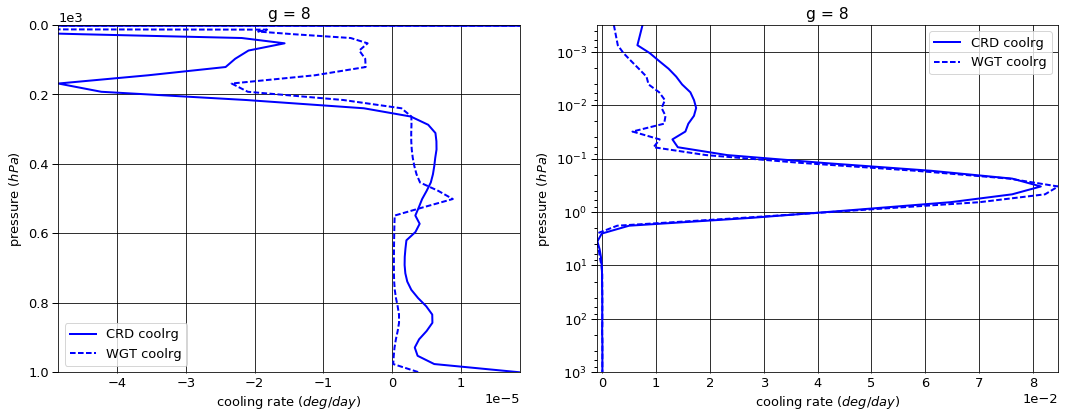

# Figure: cooling rate g-group 9

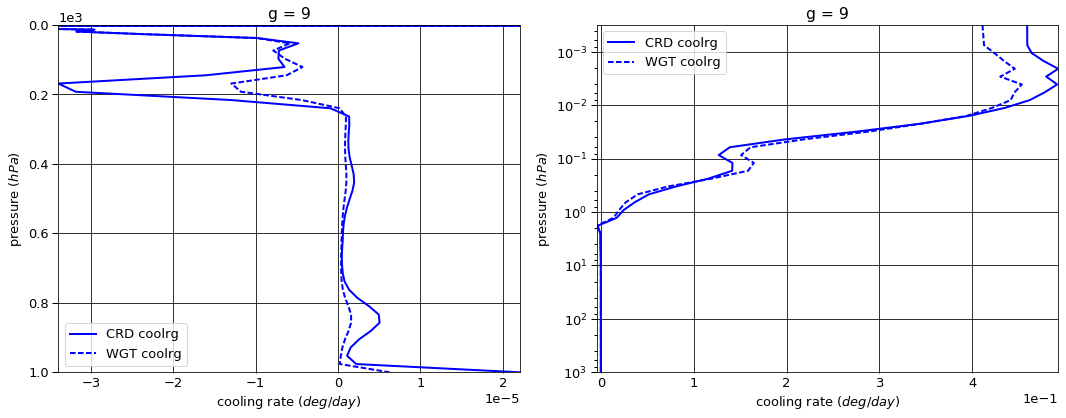

# Figure: cooling rate g-group total

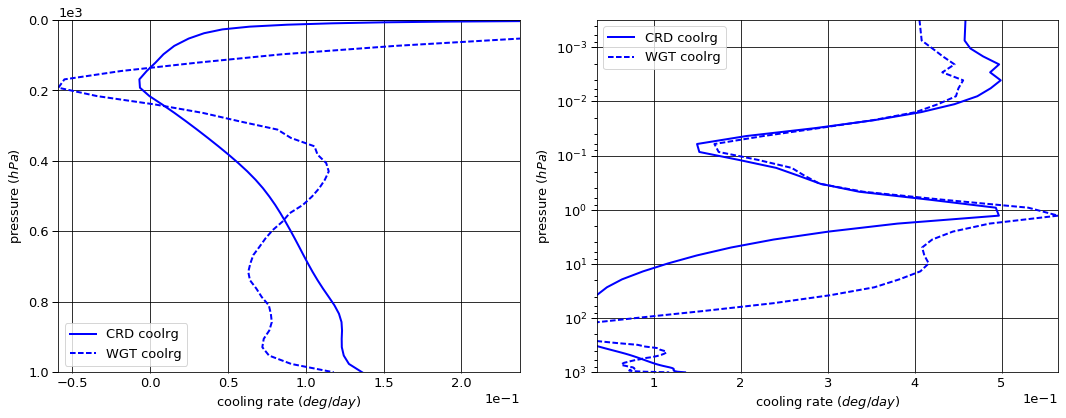

In [70]:
matplotlib.rcParams.update({'font.size': 13,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 

fig.plot(analysis)


In [71]:
table_fluxg.display_withdiff(analysis, benchmark='crd')
table_coolrg.display_withdiff(analysis, benchmark='crd')
table_flux.display_withdiff(analysis, benchmark='crd')
table_coolr.display_withdiff(analysis, benchmark='crd')

# Table: flux. g-groups 


CRD


flug       fldg      fnetg
g pressure level                                 
1 0.0      1     -25.574521   0.000000 -25.574521
  1013.0   76    -31.959885  14.659123 -17.300763
2 0.0      1      -0.100826   0.000000  -0.100826
  1013.0   76     -0.152871   0.102111  -0.050760
3 0.0      1       0.000000   0.000000   0.000000
  1013.0   76      0.000000   0.000000   0.000000
4 0.0      1       0.000000   0.000000   0.000000
  1013.0   76      0.000000   0.000000   0.000000
5 0.0      1      -0.156727   0.000000  -0.156727
  1013.0   76     -0.255075   0.201881  -0.053194
6 0.0      1      -0.089650   0.000000  -0.089650
  1013.0   76     -0.158699   0.131409  -0.027290
7 0.0      1      -0.039174   0.000000  -0.039174
  1013.0   76     -0.066832   0.064060  -0.002772
8 0.0      1      -0.008469   0.000000  -0.008469
  1013.0   76     -0.016770   0.016691  -0.000079
9 0.0      1      -0.009512   0.000000  -0.009512
  1013.0   76     -0.027411   0.027343  -0.000068


WGT


flug       fldg      fnetg
g pressure level                                 
1 0.0      1     -10.969560   0.000000 -10.969560
  1013.0   76    -31.959885  30.941765  -1.018121
2 0.0      1      -0.052801   0.000000  -0.052801
  1013.0   76     -0.152871   0.151249  -0.001622
3 0.0      1       0.000000   0.000000   0.000000
  1013.0   76      0.000000   0.000000   0.000000
4 0.0      1       0.000000   0.000000   0.000000
  1013.0   76      0.000000   0.000000   0.000000
5 0.0      1      -0.102337   0.000000  -0.102337
  1013.0   76     -0.255075   0.251493  -0.003582
6 0.0      1      -0.064045   0.000000  -0.064045
  1013.0   76     -0.158699   0.157247  -0.001452
7 0.0      1      -0.041957   0.000000  -0.041957
  1013.0   76     -0.066832   0.066443  -0.000389
8 0.0      1      -0.008463   0.000000  -0.008463
  1013.0   76     -0.016770   0.016759  -0.000011
9 0.0      1      -0.009093   0.000000  -0.009093
  1013.0   76     -0.027411   0.027394  -0.000017


WGT - CRD


flug       fldg      fnetg
g pressure level                                 
1 0.0      1      14.604961   0.000000  14.604961
  1013.0   76      0.000000  16.282642  16.282642
2 0.0      1       0.048025   0.000000   0.048025
  1013.0   76      0.000000   0.049138   0.049138
3 0.0      1       0.000000   0.000000   0.000000
  1013.0   76      0.000000   0.000000   0.000000
4 0.0      1       0.000000   0.000000   0.000000
  1013.0   76      0.000000   0.000000   0.000000
5 0.0      1       0.054390   0.000000   0.054390
  1013.0   76      0.000000   0.049612   0.049612
6 0.0      1       0.025605   0.000000   0.025605
  1013.0   76      0.000000   0.025839   0.025839
7 0.0      1      -0.002784   0.000000  -0.002784
  1013.0   76      0.000000   0.002383   0.002383
8 0.0      1       0.000005   0.000000   0.000005
  1013.0   76      0.000000   0.000069   0.000069
9 0.0      1       0.000419   0.000000   0.000419
  1013.0   76      0.000000   0.000051   0.000051

# Table: cooling rate. g-groups 


CRD


coolrg
g pressure    layer          
1 0.000312    1     -0.000041
  1001.112500 75     0.133287
2 0.000312    1     -0.000039
  1001.112500 75     0.000661
3 0.000312    1      0.000000
  1001.112500 75     0.000000
4 0.000312    1      0.000000
  1001.112500 75     0.000000
5 0.000312    1     -0.000222
  1001.112500 75     0.001323
6 0.000312    1     -0.001488
  1001.112500 75     0.000758
7 0.000312    1     -0.006236
  1001.112500 75     0.000206
8 0.000312    1      0.007475
  1001.112500 75     0.000019
9 0.000312    1      0.459093
  1001.112500 75     0.000022


WGT


coolrg
g pressure    layer          
1 0.000312    1      0.000027
  1001.112500 75     0.116477
2 0.000312    1      0.000017
  1001.112500 75     0.000365
3 0.000312    1      0.000000
  1001.112500 75     0.000000
4 0.000312    1      0.000000
  1001.112500 75     0.000000
5 0.000312    1      0.000021
  1001.112500 75     0.000684
6 0.000312    1      0.000014
  1001.112500 75     0.000356
7 0.000312    1     -0.007533
  1001.112500 75     0.000115
8 0.000312    1      0.002134
  1001.112500 75     0.000004
9 0.000312    1      0.410979
  1001.112500 75     0.000006


WGT - CRD


coolrg
g pressure    layer          
1 0.000312    1      0.000067
  1001.112500 75    -0.016809
2 0.000312    1      0.000056
  1001.112500 75    -0.000296
3 0.000312    1      0.000000
  1001.112500 75     0.000000
4 0.000312    1      0.000000
  1001.112500 75     0.000000
5 0.000312    1      0.000243
  1001.112500 75    -0.000639
6 0.000312    1      0.001503
  1001.112500 75    -0.000403
7 0.000312    1     -0.001297
  1001.112500 75    -0.000090
8 0.000312    1     -0.005341
  1001.112500 75    -0.000015
9 0.000312    1     -0.048113
  1001.112500 75    -0.000016

# Table: flux. g-groups total


CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-25.978878,0.000000,-25.978878
1013.0,76,-32.637543,15.202617,-17.434926



WGT


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-11.248257,0.00000,-11.248257
1013.0,76,-32.637543,31.61235,-1.025193



WGT - CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,14.730622,0.000000,14.730622
1013.0,76,0.000000,16.409733,16.409734


# Table: cooling rate. g-groups total


CRD


,,coolrg
pressure,layer,
0.000312,1,0.458541
1001.112500,75,0.136275



WGT


,,coolrg
pressure,layer,
0.000312,1,0.405659
1001.112500,75,0.118007



WGT - CRD


,,coolrg
pressure,layer,
0.000312,1,-0.052882
1001.112500,75,-0.018268


In [72]:
table_dgdgs.display_dgdgs(crd)

# Table: dgdgs. g-groups 

,dg,dgs
g,,
1,0.979563,0.978983
2,0.004625,0.004729
3,0.000000,0.000000
4,0.000000,0.000000
5,0.007687,0.007914
6,0.004812,0.004903
7,0.002000,0.002085
8,0.000500,0.000525
9,0.000812,0.000862


In [73]:
# read and display overall absth
display.display(
    display.HTML(climahtml.getHTML_idanchor(s_abscom)))
display.display(
    display.Markdown(climahtml.getMarkdown_sectitle(s_abscom)))

display.display(pd.read_csv(os.path.join(crd.rundir, 'abscom.dat'),
                sep=r'\s+',
                index_col=[0]))

# Overall absth

,abscom
g,
1,2.959058e-25
2,6.378566e-24
3,6.102842e-23
4,5.839038e-22
5,1.606302e-23
6,1.712697e-22
7,1.826139e-21
8,1.947095e-20
9,2.076063e-19


In [74]:
def spreadsheet():
    ng = 9
    ng_refs = [5, 4]
    p_refs = [1, 500]
    
    df_abscom = pd.read_csv(os.path.join(crd.rundir, 'abscom.dat'), 
                            sep=r'\s+', index_col=[0])
    
    # absth(g + 1) / absth(g)
    df_abscom_copy = df_abscom.copy()
    df_abscom_copy.index = df_abscom.index + 1
    df_absratio = df_abscom / df_abscom_copy
    df_absratio.columns = ['k(ig) / k(ig - 1)']
    df_absratio = df_absratio.loc[: ng]
    df_dgdgs = crd.data['dgdgs'].to_dataframe()
    
    
    df_dgdgs_cumsum = df_dgdgs.cumsum(axis=0)
    df_dgdgs_cumsum.columns = ['dg cumsum', 'dgs cumsum']
    
    data_pref = np.concatenate([p_ref * np.ones((ng_ref,)) 
                                for ng_ref, p_ref 
                                in zip(ng_refs, p_refs)], axis=0)
    df_pref = pd.DataFrame(data_pref[::-1], 
                           index=df_dgdgs.index, columns=['pref'])
    
    df_all = pd.concat([df_abscom, df_absratio,
                        df_dgdgs, df_dgdgs_cumsum,
                        df_pref], axis=1) 
    return df_all
    

In [75]:
display.display(display.HTML(climahtml.getHTML_idanchor(s_ggroup_summary)))
display.display(display.Markdown(climahtml.getMarkdown_sectitle(s_ggroup_summary)))
display.display(spreadsheet())

# g-group summary

,abscom,k(ig) / k(ig - 1),dg,dgs,dg cumsum,dgs cumsum,pref
g,,,,,,,
1,2.959058e-25,NaN,0.979563,0.978983,0.979563,0.978983,500.0
2,6.378566e-24,21.556067,0.004625,0.004729,0.984187,0.983712,500.0
3,6.102842e-23,9.567734,0.000000,0.000000,0.984187,0.983712,500.0
4,5.839038e-22,9.567735,0.000000,0.000000,0.984187,0.983712,500.0
5,1.606302e-23,0.027510,0.007687,0.007914,0.991875,0.991626,1.0
6,1.712697e-22,10.662360,0.004812,0.004903,0.996687,0.996529,1.0
7,1.826139e-21,10.662360,0.002000,0.002085,0.998687,0.998613,1.0
8,1.947095e-20,10.662360,0.000500,0.000525,0.999187,0.999138,1.0
9,2.076063e-19,10.662360,0.000812,0.000862,1.000000,1.000000,1.0


In [76]:
def load_d_bigsum():
    
    ng = 10
    
    fpath = os.path.join(crd.rundir, 'd_bigsum.dat')
    df = pd.read_csv(fpath, sep=r'\s+', index_col = [0, 1])

    g_layers = [(1, 62), (2, 58)]
    
    writer = pd.ExcelWriter('_'.join(['d_bigsum_absgas',
                                      'ng_{}'.format(ng)])
                            + '.xlsx')
    for g, layer in g_layers:
        df.loc[(g, layer), :].to_excel(writer, 
                                       '({}, {})'.format(g, layer))
        

#load_d_bigsum()

# Histogram of wavenumbers in g-group 1

In [77]:
#pd.read_csv(os.path.join(crd.rundir, 'ig1.dat')).hist()

In [78]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')